# Imports

In [1]:
from utils import *
import sympy as sp
from Newton import *
from Gauss import *
from Lagrange import *

Таблица конечных разностей готова! 



# Дифференцирование таблично заданной функции с помощью многочлена Лагранжа

Наши точки:

In [3]:
pointsX, pointsY

([0, 1, 2, 3], [16, 17, 18, 19])

Формула интерполяции Лагранжа, проходящая через эти точки выглядит следующим образом:

In [8]:
expr = LagrangeSym()

expr

17*x*(3/2 - x/2)*(2 - x) + 9*x*(3 - x)*(x - 1) + 19*x*(x/2 - 1/2)*(x - 2)/3 + 16*(1 - x)*(1 - x/2)*(1 - x/3)

Формула выше является (странной), но формулой Лагранжа для интерполяции конкретно нашей Функции

К слову о нашей функции - если рассмотреть таблицу, то на выделенном таблице отрезке можно утверждать что функция является прямой

Text(0.5, 1.0, 'Интерполяция Лагранжа')

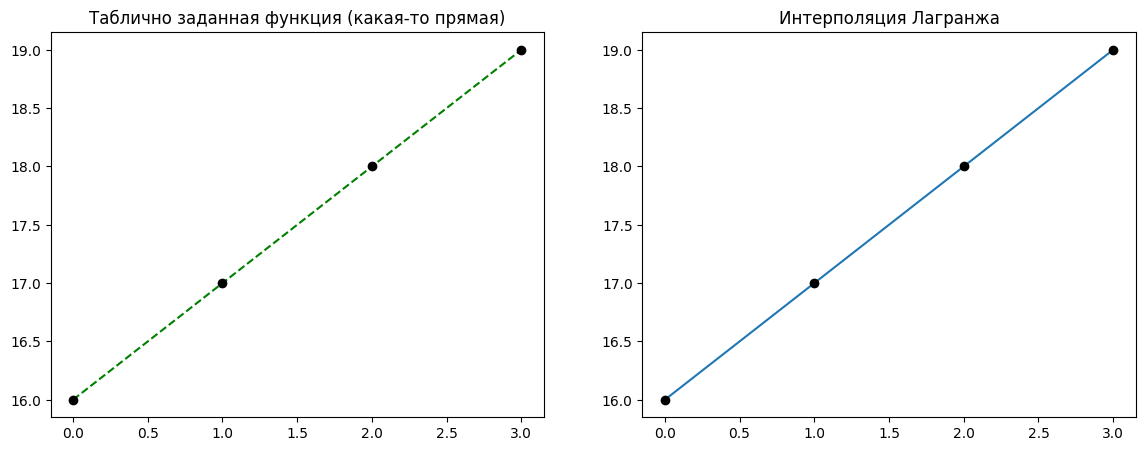

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(pointsX, pointsY, c="black", zorder=5)
axs[0].plot(pointsX, pointsY, c="green", linestyle="dashed")
axs[0].set_title('Таблично заданная функция (какая-то прямая)')

axs[1].scatter(pointsX, pointsY, c="black", zorder=5)
axs[1].plot(space, [expr.subs(x, i) for i in space],)
axs[1].set_title('Интерполяция Лагранжа')

Если смотреть на график, то можно заметить что они тоже выглядят как прямые.

Это все к тому что дальнейшие вычисления производных должны выдать нам значение _1_, для первой производной и значение _0_ для вторых и более - потому что работаем с прямой

 Теперь найдем по формуле погрешность для дифференцирования:

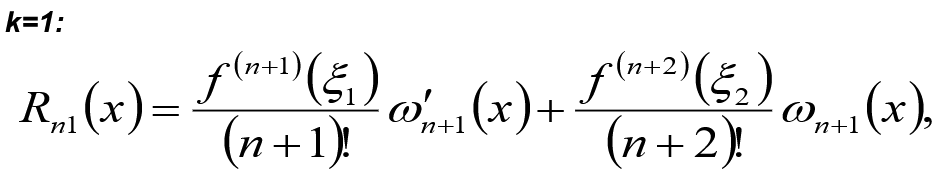

Как мы можем увидеть в формуле остаточного члена дифференцирования у нас берутся производные стоко раз, сколько у нас точек и более.

Это важно потому что если обратить внимание на табличные данные, у нас везде более чем 1 точка, что позволяет нам утверждать что все наши остаточные члены будут равны нулю (Вне зависимости от порядка дифференцирования)

Таким образом по идее наша интерполяция должна выдать результат без какой-либо (за исключением машинной) погрешности

Давайте уже найдем наши производные и посмотрим на их значения в некоторых точках

In [14]:
diff1 = sp.diff(expr)
diff1

-17*x*(3/2 - x/2) - 17*x*(2 - x)/2 + 9*x*(3 - x) + 19*x*(x/2 - 1/2)/3 + 19*x*(x - 2)/6 - 9*x*(x - 1) - 16*(1 - x)*(1 - x/2)/3 - 8*(1 - x)*(1 - x/3) - 16*(1 - x/2)*(1 - x/3) + 17*(3/2 - x/2)*(2 - x) + 9*(3 - x)*(x - 1) + 19*(x/2 - 1/2)*(x - 2)/3

In [15]:
diff2 = sp.diff(diff1)
diff2

0

Первая производная выглядит немного страшно, однако вторая производная у нас равна нулю, что является верным для прямой! Давайте рассмотрим некоторые точки для первой производной чтобы удостовериться что она равна единице 

In [21]:
diff1.subs(x, 2.5), diff1.subs(x, 2.8), diff1.subs(x, 3), diff1.subs(x, 3.14)

(1.00000000000000, 1.00000000000000, 1, 1.00000000000002)

Как можно увидеть выше мы имеем почти единицу в точках не принадлежащих таблице, и точно имеем единицу в точках таблицы. В силу того что работа ведется на компьютере, подобного рода неточности убрать либо проблематично, либо невозможно.